In [1]:
#Import das Libs
import numpy as np
import cv2
from matplotlib import pyplot as plot

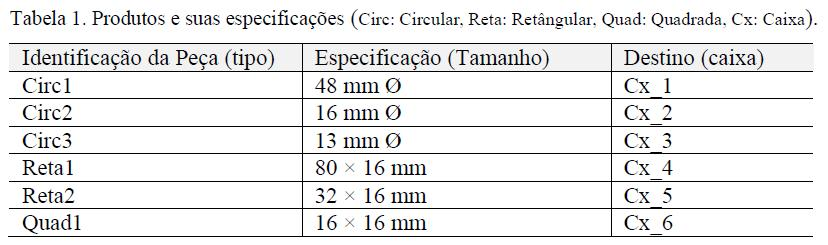

In [5]:
#Realiza-se o Upload das Imagem para o Google Colab.
#Em seguida, importa-se a imagem

img = cv2.imread('/content/Images/img_101.jpg')

In [6]:
#Separação em três bandas indenpendentes (BRG)
B, G, R = cv2.split(img)

In [7]:
#Escolheu-se utilizar a Banda B (Azul) pelo fato da mesma destacar melhor os objetos da imagem.
img_gray = B

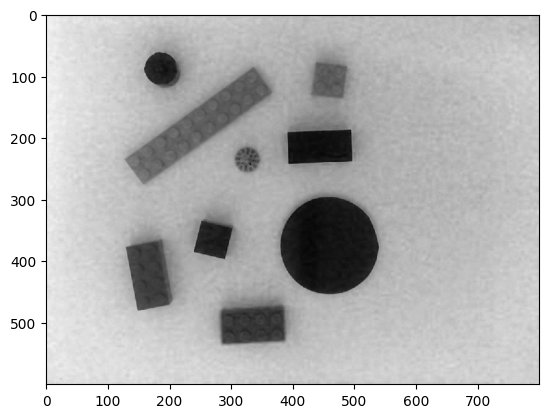

In [8]:
#visualização da Imagem
plot.imshow(img_gray,cmap='gray')
plot.show()

In [9]:
#Estatística - Exibe-se valores de Mínimo, Máximo e Média da Figura em Níveis de Cinza

print("Valor máximo de nível de cinza: " + str(img_gray.max()))
print("Valor mínimo de nível de cinza: " + str(img_gray.min()))
print("Valor médio de nível de cinza: " + str(img_gray.mean()))

Valor máximo de nível de cinza: 209
Valor mínimo de nível de cinza: 2
Valor médio de nível de cinza: 142.29048125


In [10]:
#Baseando-se nos experimentos feitos, criou-se uma estrutura de decisão para definir o ajuste fino do valor de gamma.
#Para isso, usou-se como parâmetro o valor médio de nível de cinza da imagem.
#Desta forma, foi possível solucionar problemas de sombras e ruídos nas imagens.

if img_gray.mean() > 142.31 and img_gray.mean() < 142.37:
    gamma = 0.467
elif img_gray.mean() > 142.37 and img_gray.mean() < 142.4:
    gamma = 0.865
elif img_gray.mean() > 148.0 and img_gray.mean() < 148.9:
    gamma = 0.075
elif img_gray.mean() > 150.0 and img_gray.mean() < 150.9:
    gamma = 0.850
elif img_gray.mean() > 151.0 and img_gray.mean() < 151.9:
    gamma = 0.750
elif img_gray.mean() > 155.0 and img_gray.mean() < 155.9:
    gamma = 0.680
elif img_gray.mean() > 139.0 and img_gray.mean() < 139.9:
    gamma = 0.750
elif img_gray.mean() > 140.0 and img_gray.mean() < 140.9:
    gamma = 0.735
elif img_gray.mean() > 143.78 and img_gray.mean() < 143.79:
    gamma = 0.285
elif img_gray.mean() > 143.6 and img_gray.mean() < 143.9:
    gamma = 0.710
elif img_gray.mean() > 146.00 and img_gray.mean() < 146.05:
    gamma = 0.675
else:
    gamma = 1.015

print("Valor de Gamma: " + str(gamma))

Valor de Gamma: 1.015


In [11]:
#Em seguida, aplica-se a transformação por potência com o objetivo de destacar melhor os objetos da Imagem.

entrada = img_gray/img_gray.max()
img_gray = entrada ** gamma * 255

In [12]:
#Por fim, é necessário converter a imagem para o formato Uint8
#Sem esta conversão, não foi possível aplicar a binarização na imagem resultante da transformação por potência
img_gray = img_gray.astype("uint8")

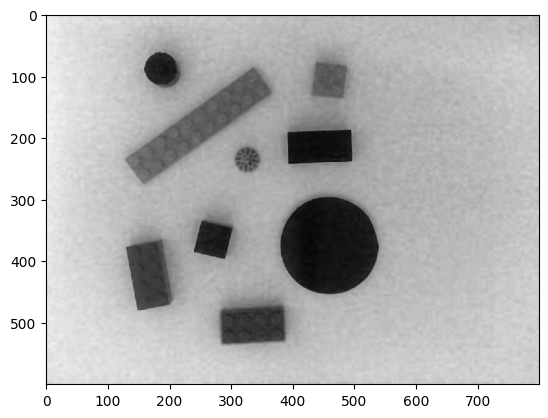

In [13]:
#Visualização da Imagem
plot.imshow(img_gray, cmap='gray')
plot.show()

In [14]:
#Adiciona-se bordas nos objetos da imagem por meio dos operadores de Roberts
masc1 = np.array([[0, 1], [-1, 0]])
masc2 = np.array([[1, 0], [0, -1]])

In [15]:
#Definição das bordas com os peradores de Roberts
img_roberts1 = cv2.filter2D(img_gray, -1, masc1)
img_roberts2 = cv2.filter2D(img_gray, -1, masc2)
img_roberts = cv2.add(img_roberts1, img_roberts2)

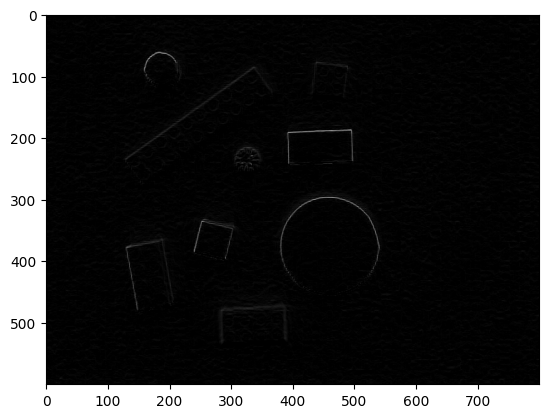

In [16]:
#Visualização das Bordas
plot.imshow(img_roberts, cmap='gray')
plot.show()

In [17]:
#Enfatização das bordas na Imagem
img_gray = img_gray + img_roberts

In [18]:
#Aplicaçao do filtro de Média Para a diminuição de ruídos na imagem
img_gray = cv2.blur(img_gray,(3,3))

In [19]:
#Aplicaçao do filtro de Mediana Para a diminuição de ruídos na imagem
img_gray = cv2.medianBlur(img_gray,3)

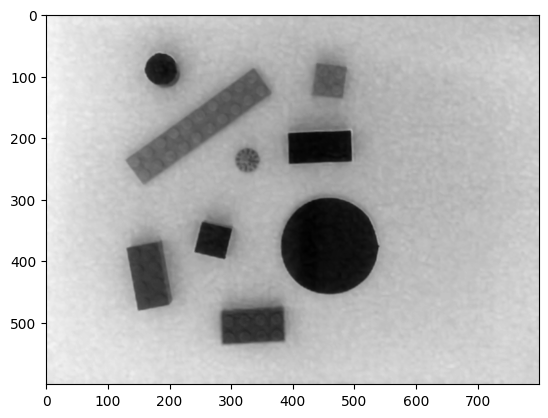

In [20]:
#Visualização da Imagem
plot.imshow(img_gray, cmap='gray')
plot.show()

In [21]:
#Realiza-se a Binarização da imagem por meio da Função THRESH_BINARY + THRESH_OTSU
otsu_threshold, img_bin = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

In [22]:
#Valor de Threshold
print("Valor Threshold: ", otsu_threshold)

Valor Threshold:  125.0


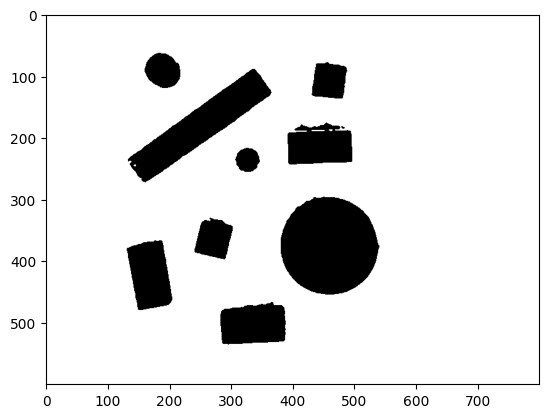

In [23]:
#Visualização da Imagem Binarizada
plot.imshow(img_bin, cmap='gist_gray')
plot.show()

In [24]:
#Em seguida, inverte-se as cores por meio da transformação em negativo;
#Objetos pretos com fundo branco impossibilita tarefas de binarização, como o método de OTSU.

e = img_bin/img_gray.max()
img_bin = e.max()-e

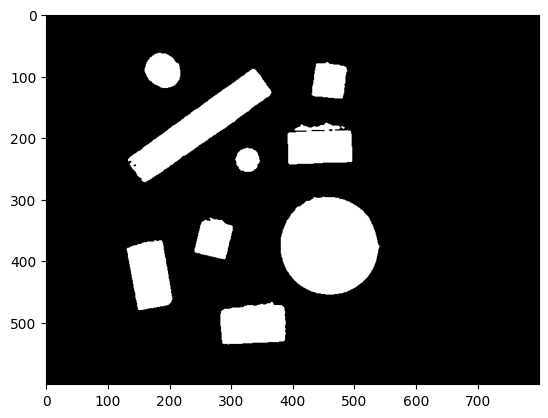

In [25]:
#Exibição da imagem invertida e convertida para o formato "uint8"
img_bin = img_bin.astype("uint8")
plot.imshow(img_bin, cmap='gray')
plot.show()

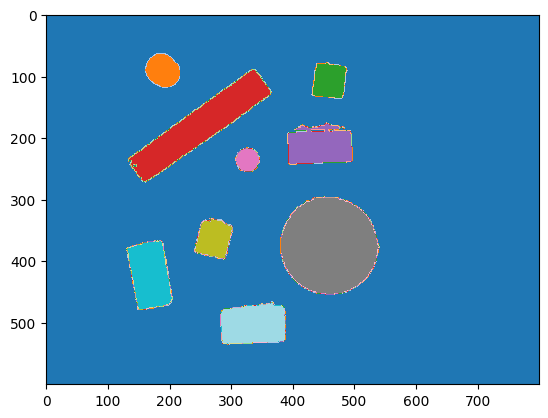

In [26]:
#Identificação e Exibição de Componentes Conexos
(numCCs, imgLabels, stats, centroids) = cv2.connectedComponentsWithStats(img_bin, connectivity=8)
plot.imshow(imgLabels, cmap='tab20');

Componente 1: Área = 2496, 57x58
Componente 2: Área = 2771, 59x58
Componente 3: Área = 12895, 184x233
Componente 4: Área = 5912, 68x105
Componente 5: Área = 1179, 39x40
Componente 6: Área = 19774, 159x160
Componente 7: Área = 3011, 68x62
Componente 8: Área = 6191, 113x74
Componente 9: Área = 6235, 69x106

Total de Componentes identificados é: 9


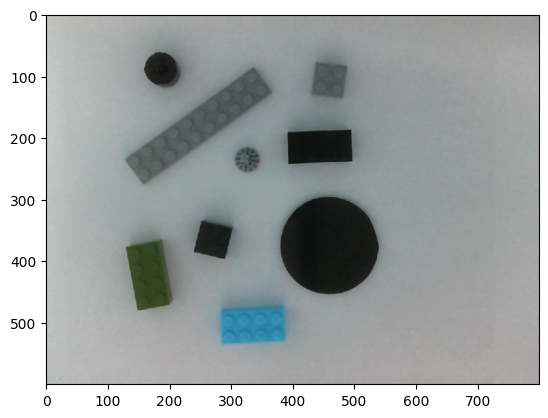

In [27]:
#Exibe-se a área de cada componente conexo detectado. Utilizou-se um segundo contador com uma estrutura if
#com o objetivo de não computar ruídos remanescentes como Componentes Conexos

c = 0
for i in range (numCCs):

    if stats[i,cv2.CC_STAT_AREA] > 450:
        #Tenta-se desta forma, eliminar os ruídos interpretados como componentes conexos

        if i > 0:
            c = c + 1
            print("Componente " + str(c) + ": Área = " + str(stats[i,cv2.CC_STAT_AREA]) + ", " +
                 str(stats[i,cv2.CC_STAT_HEIGHT]) + "x" + str(stats[i,cv2.CC_STAT_WIDTH]))

print("\nTotal de Componentes identificados é: " + str(c))
plot.imshow(img,cmap='gray')
plot.show()

In [28]:
#Inicia-se as variáveis, uma para cada tipo de peça Lego
circ1 = 0
circ2 = 0
circ3 = 0
reta1 = 0
reta2 = 0
quad1 = 0

In [29]:
#Efetua-se uma a classificação, juntamente com uma contagem de caixas.

i = 0
for i in range (numCCs):

    if stats[i,cv2.CC_STAT_AREA] > 16000 and stats[i,cv2.CC_STAT_AREA] < 22000: #Caixa1
        circ1 = circ1 + 1

    if stats[i,cv2.CC_STAT_AREA] > 2000 and stats[i,cv2.CC_STAT_AREA] < 2500: #Caixa2
        circ2 = circ2 + 1

    if stats[i,cv2.CC_STAT_AREA] > 800 and stats[i,cv2.CC_STAT_AREA] < 2000: #Caixa3
        circ3 = circ3 + 1

    if stats[i,cv2.CC_STAT_AREA] > 8000 and stats[i,cv2.CC_STAT_AREA] < 15000: #Caixa4
        reta1 = reta1 + 1

    if stats[i,cv2.CC_STAT_AREA] > 5000 and stats[i,cv2.CC_STAT_AREA] < 8000: #Caixa5
        reta2 = reta2 + 1

    if stats[i,cv2.CC_STAT_AREA] > 2499 and stats[i,cv2.CC_STAT_AREA] < 3500: #Caixa6
        quad1 = quad1 + 1

Caixa 1 (Circ1 - Circulo de 48mmØ): 1
Caixa 2 (Circ2 - Circulo de 16mmØ): 1
Caixa 3 (Circ3 - Circulo de 13mmØ): 1
Caixa 4 (Reta1 - Retangulo de 80×16mm): 1
Caixa 5 (Reta2 - Retangulo de 32×16mm): 3
Caixa 6 (Quad1 - Quadrado de 16x16mm): 2


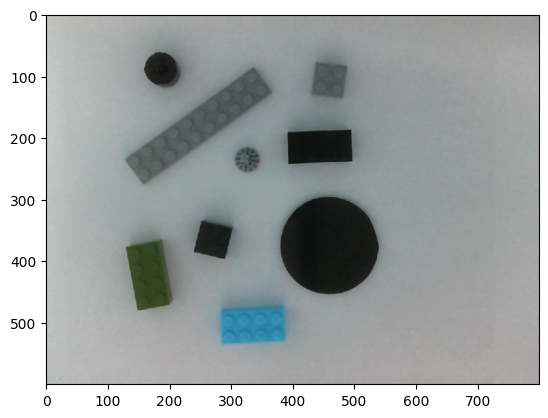

In [30]:
#Print do Total de Caixas Necessárias identificadas
print("Caixa 1 (Circ1 - Circulo de 48mmØ): " + str(circ1))
print("Caixa 2 (Circ2 - Circulo de 16mmØ): " + str(circ2))
print("Caixa 3 (Circ3 - Circulo de 13mmØ): " + str(circ3))
print("Caixa 4 (Reta1 - Retangulo de 80×16mm): " + str(reta1))
print("Caixa 5 (Reta2 - Retangulo de 32×16mm): " + str(reta2))
print("Caixa 6 (Quad1 - Quadrado de 16x16mm): " + str(quad1))

plot.imshow(img,cmap='gray')
plot.show()

O Componente 1, [189.18349359  91.31009615] é classificado como Circ2: Cx_2 
O Componente 2, [459.33273187 107.89029231] é classificado como Quad1: Cx_6 
O Componente 3, [250.0064366  180.40263668] é classificado como Reta1: Cx_4 
O Componente 4, [443.72259811 212.73494587] é classificado como Reta2: Cx_5 
O Componente 5, [326.67345208 236.1620017 ] é classificado como Circ3: Cx_3 
O Componente 6, [458.94255082 375.42358653] é classificado como Circ1: Cx_1 
O Componente 7, [272.01727001 363.83493856] é classificado como Quad1: Cx_6 
O Componente 8, [168.24261024 422.74220643] é classificado como Reta2: Cx_5 
O Componente 9, [336.14883721 502.82357658] é classificado como Reta2: Cx_5 


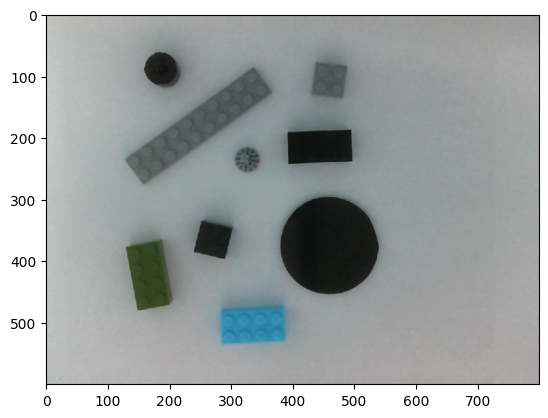

In [31]:
#Resultado Final
c = 1
for i in range (numCCs):

    if stats[i,cv2.CC_STAT_AREA] > 500:

        if i > 0:
            if stats[i,cv2.CC_STAT_AREA] > 16000 and stats[i,cv2.CC_STAT_AREA] < 22000:
                print("O Componente " + str(c) + ", " + str(centroids[i]) + " é classificado como Circ1: Cx_1 ")
            if stats[i,cv2.CC_STAT_AREA] > 2000 and stats[i,cv2.CC_STAT_AREA] < 2500:
                print("O Componente " + str(c) + ", " + str(centroids[i]) + " é classificado como Circ2: Cx_2 ")
            if stats[i,cv2.CC_STAT_AREA] > 800 and stats[i,cv2.CC_STAT_AREA] < 2000:
                print("O Componente " + str(c) + ", " + str(centroids[i]) + " é classificado como Circ3: Cx_3 ")
            if stats[i,cv2.CC_STAT_AREA] > 8000 and stats[i,cv2.CC_STAT_AREA] < 15000:
                print("O Componente " + str(c) + ", " + str(centroids[i]) + " é classificado como Reta1: Cx_4 ")
            if stats[i,cv2.CC_STAT_AREA] > 5000 and stats[i,cv2.CC_STAT_AREA] < 8000:
                print("O Componente " + str(c) + ", " + str(centroids[i]) + " é classificado como Reta2: Cx_5 ")
            if stats[i,cv2.CC_STAT_AREA] > 2499 and stats[i,cv2.CC_STAT_AREA] < 3500:
                print("O Componente " + str(c) + ", " + str(centroids[i]) + " é classificado como Quad1: Cx_6 ")
            c = c + 1

plot.imshow(img,cmap='gray')
plot.show()